In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Cooperative
# -----------
# Coop nav. (simple_spead_in)
# Hetero nav. (hetero_spread_in)

# Competitive
# -----------
# Phy decep (simple_adversary_in)
# Pred-prey (simple_tag_in)
# Keep-away (simple_push_in)

occupancy_dir = 'occupancy_csvfiles'
worldmodels_dir = 'worldmodel_csvfiles'
reward_dir = 'reward_csvfiles'
best_reward_dir = 'best_reward_csvfiles'
varying_num_layers_dir = 'varying_num_layers_csvfiles'
varying_num_agents_dir = 'varying_num_agents_csvfiles'


sns.set_theme(style="whitegrid")

# Plot Occupancy Count

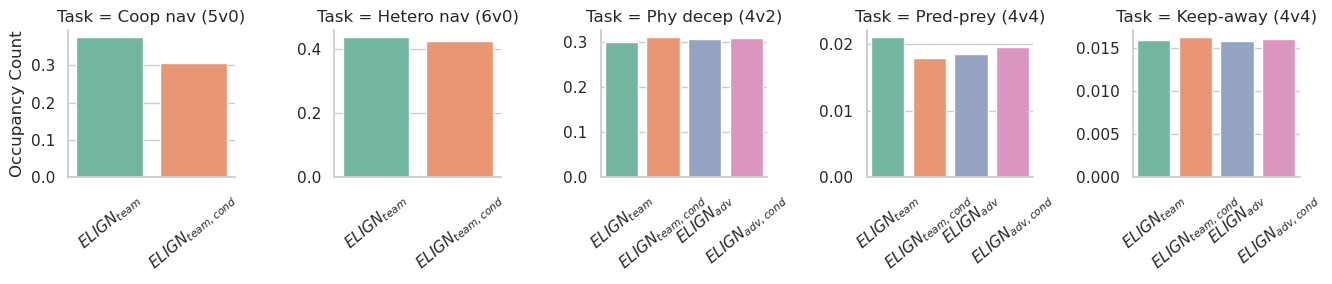

In [53]:
data = {'Task': [], 'Method': [], 'Occupancy Count':[]}
csvfiles = os.listdir(occupancy_dir)
for csvfile in csvfiles:
    df_temp = pd.read_csv(os.path.join(occupancy_dir,csvfile))

    if 'team' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{team,cond}$'
    elif 'team' in csvfile:
        method = '$ELIGN_{team}$'
    elif 'adv' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{adv,cond}$'
    elif 'adv' in csvfile:
        method = '$ELIGN_{adv}$'

    if 'simple_spread' in csvfile:
        task = 'Coop nav (5v0)'
    elif 'hetero_spread' in csvfile:
        task = 'Hetero nav (6v0)'
    elif 'simple_adversary' in csvfile:
        task = 'Phy decep (4v2)'
    elif 'simple_tag' in csvfile:
        task = 'Pred-prey (4v4)'
    elif 'simple_push' in csvfile:
        task = 'Keep-away (4v4)'

    occupancy_count = df_temp.Value.iloc[49].item()

    data['Task'].append(task)
    data['Method'].append(method)
    data['Occupancy Count'].append(occupancy_count)
df = pd.DataFrame(data).sort_values(by=['Task', 'Method'],ascending=False, ignore_index=True)

g = sns.catplot(x="Method", y="Occupancy Count", hue="Method", col='Task', data=df, kind="bar",
                height=3, aspect=0.9, col_order=['Coop nav (5v0)','Hetero nav (6v0)','Phy decep (4v2)', 'Pred-prey (4v4)', 'Keep-away (4v4)'], 
                palette=sns.color_palette("Set2"), sharey=False, sharex=False, dodge=False);
g.set_xticklabels(rotation=40)
g.set(xlabel=None)
plt.tight_layout()
plt.savefig('figures/occupancy_count.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# Plot Test Reward

/tmp/ipykernel_27849/2402454092.py:51: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, df_group) in enumerate(df_groups):
/tmp/ipykernel_27849/2402454092.py:60: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g = sns.lineplot(x="Step", y="Value", hue="method", data=df_group, hue_order=hue_orders[i], palette=sns.color_palette("Set2"), ax=ax, legend=legend)
/tmp/ipykernel_27849/2402454092.py:60: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g = sns.lineplot(x="Step", y="Value", hue="method", data=df_group, hue_order=hue_orders[i], palette=sns.color_palette("Set2"), ax=ax, legend=legend)
/tmp/ipykernel_27849/2402454092.py:60: UserWarning: The palette list has more values (8) than needed (4), which may not be 

Coop nav (5v0)
Hetero nav (6v0)
Keep-away (4v4)
Phy decep (4v2)
Pred-prey (4v4)


/tmp/ipykernel_27849/2402454092.py:71: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


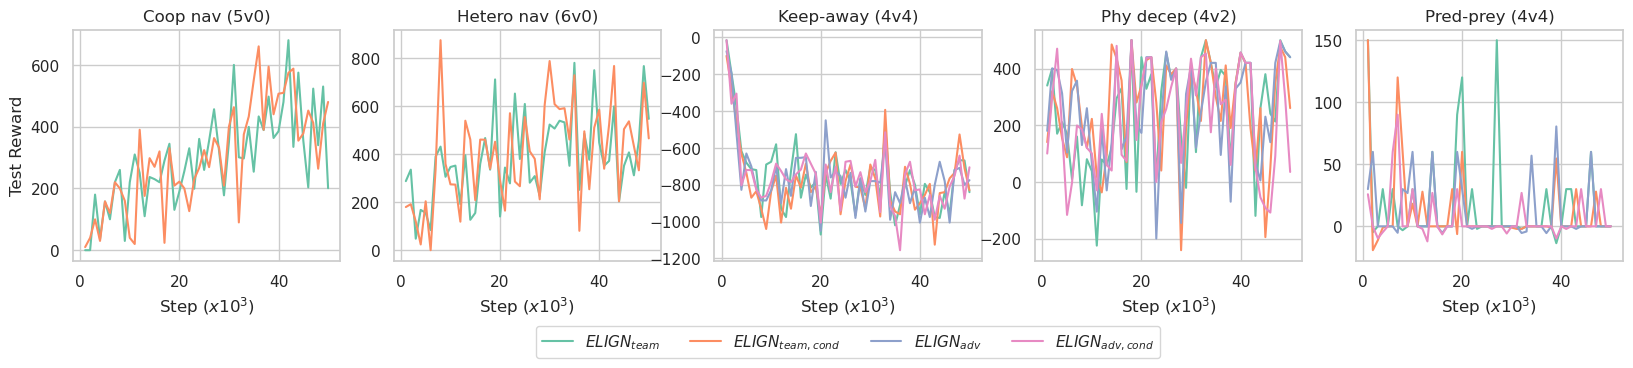

In [107]:
#data = {'Task': [], 'Method': [], 'Occupancy Count':[]}
csvfiles = os.listdir(reward_dir)
for i, csvfile in enumerate(csvfiles):
    df_temp = pd.read_csv(os.path.join(reward_dir,csvfile))
    
    if 'team' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{team,cond}$'
        conditioned = True
    elif 'team' in csvfile:
        method = '$ELIGN_{team}$'
        conditioned = False
    elif 'adv' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{adv,cond}$'
        conditioned = True
    elif 'adv' in csvfile:
        method = '$ELIGN_{adv}$'
        conditioned = False

    if 'simple_spread' in csvfile:
        task = 'Coop nav (5v0)'
    elif 'hetero_spread' in csvfile:
        task = 'Hetero nav (6v0)'
    elif 'simple_adversary' in csvfile:
        task = 'Phy decep (4v2)'
    elif 'simple_tag' in csvfile:
        task = 'Pred-prey (4v4)'
    elif 'simple_push' in csvfile:
        task = 'Keep-away (4v4)'

    df_temp['task'] = task
    df_temp['method'] = method
    df_temp['conditioned'] = conditioned

    if i == 0:
        df = df_temp
    else:
        df = pd.concat([df, df_temp], ignore_index=True)

    

#df_conditioned = df.groupby('conditioned').get_group(True)
#df_notconditioned = df.groupby('conditioned').get_group(False)

df_groups = df.groupby(['task'])
hue_orders = [['$ELIGN_{team}$', '$ELIGN_{team,cond}$'],
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$'], 
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$', '$ELIGN_{adv}$', '$ELIGN_{adv,cond}$'],
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$', '$ELIGN_{adv}$', '$ELIGN_{adv,cond}$'],
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$', '$ELIGN_{adv}$', '$ELIGN_{adv,cond}$']]
fig,axes=plt.subplots(nrows=1, ncols=5, figsize=(20,3))
for i, (name, df_group) in enumerate(df_groups):
    ax = axes[i]
    print(name)

    legend=False
    if i == 4:
        legend=True
    else:
        legend=False
    g = sns.lineplot(x="Step", y="Value", hue="method", data=df_group, hue_order=hue_orders[i], palette=sns.color_palette("Set2"), ax=ax, legend=legend)
    if legend == True:
        plt.legend(loc="upper center", bbox_to_anchor=(-1.9, -0.25), ncol=4)

    ax.set_ylabel('')
    if i==0:
        ax.set_ylabel('Test Reward')
    ax.set_xlabel('Step ($x10^3$)')
    ax.set_title(name)

#plt.suptitle('Test Reward after 50 Epochs')
plt.tight_layout()
plt.savefig('figures/test_reward.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

    

# Plot World Model Loss

/tmp/ipykernel_27849/2647924179.py:45: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, df_group) in enumerate(df_groups):
/tmp/ipykernel_27849/2647924179.py:54: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g = sns.lineplot(x="Step", y="Value", hue="method", data=df_group, hue_order=hue_orders[i], palette=sns.color_palette("Set2"), ax=ax, legend=legend)
/tmp/ipykernel_27849/2647924179.py:54: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g = sns.lineplot(x="Step", y="Value", hue="method", data=df_group, hue_order=hue_orders[i], palette=sns.color_palette("Set2"), ax=ax, legend=legend)
/tmp/ipykernel_27849/2647924179.py:54: UserWarning: The palette list has more values (8) than needed (4), which may not be 

Coop nav (5v0)
Hetero nav (6v0)
Keep-away (4v4)
Phy decep (4v2)
Pred-prey (4v4)


/tmp/ipykernel_27849/2647924179.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


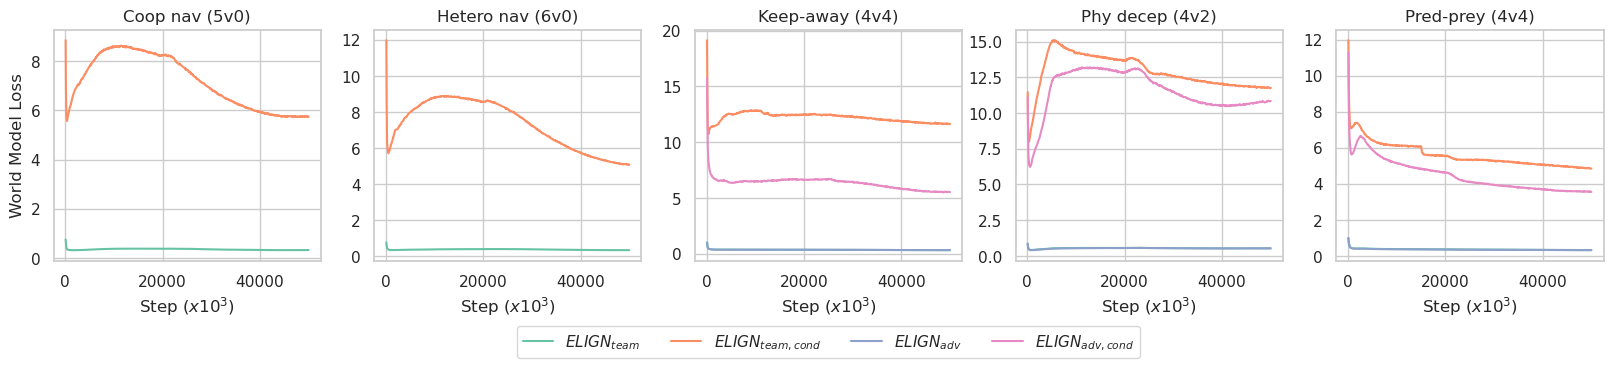

In [104]:
csvfiles = os.listdir(worldmodels_dir)
for i, csvfile in enumerate(csvfiles):
    df_temp = pd.read_csv(os.path.join(worldmodels_dir,csvfile))
    
    if 'team' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{team,cond}$'
        conditioned = True
    elif 'team' in csvfile:
        method = '$ELIGN_{team}$'
        conditioned = False
    elif 'adv' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{adv,cond}$'
        conditioned = True
    elif 'adv' in csvfile:
        method = '$ELIGN_{adv}$'
        conditioned = False

    if 'simple_spread' in csvfile:
        task = 'Coop nav (5v0)'
    elif 'hetero_spread' in csvfile:
        task = 'Hetero nav (6v0)'
    elif 'simple_adversary' in csvfile:
        task = 'Phy decep (4v2)'
    elif 'simple_tag' in csvfile:
        task = 'Pred-prey (4v4)'
    elif 'simple_push' in csvfile:
        task = 'Keep-away (4v4)'

    df_temp['task'] = task
    df_temp['method'] = method
    df_temp['conditioned'] = conditioned

    if i == 0:
        df = df_temp
    else:
        df = pd.concat([df, df_temp], ignore_index=True)

df_groups = df.groupby(['task'])
hue_orders = [['$ELIGN_{team}$', '$ELIGN_{team,cond}$'],
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$'], 
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$', '$ELIGN_{adv}$', '$ELIGN_{adv,cond}$'],
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$', '$ELIGN_{adv}$', '$ELIGN_{adv,cond}$'],
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$', '$ELIGN_{adv}$', '$ELIGN_{adv,cond}$']]
fig,axes=plt.subplots(nrows=1, ncols=5, figsize=(20,3))
for i, (name, df_group) in enumerate(df_groups):
    ax = axes[i]
    print(name)

    legend=False
    if i == 4:
        legend=True
    else:
        legend=False
    g = sns.lineplot(x="Step", y="Value", hue="method", data=df_group, hue_order=hue_orders[i], palette=sns.color_palette("Set2"), ax=ax, legend=legend)
    if legend == True:
        plt.legend(loc="upper center", bbox_to_anchor=(-1.9, -0.25), ncol=4)
    ax.set_ylabel('')
    if i==0:
        ax.set_ylabel('World Model Loss')
    ax.set_xlabel('Step ($x10^3$)')
    ax.set_title(name)

#plt.suptitle('Test Reward after 50 Epochs')
plt.tight_layout()
plt.savefig('figures/worldmodel_loss.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

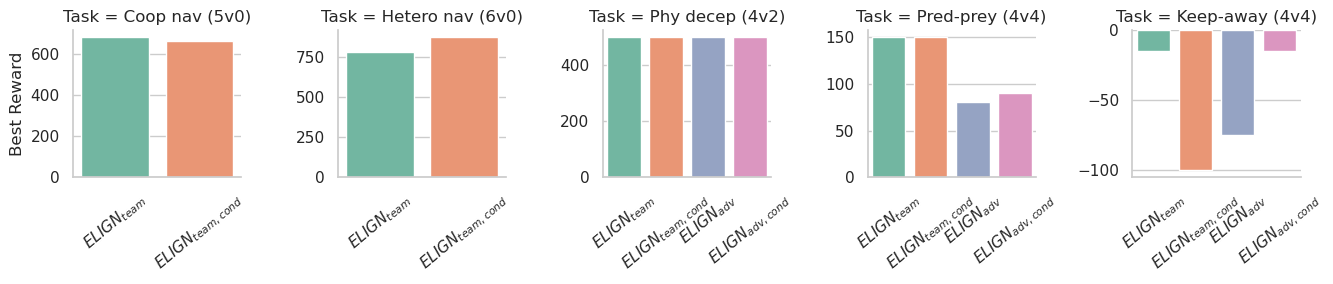

In [9]:
data = {'Task': [], 'Method': [], 'Best Reward':[]}
csvfiles = os.listdir(best_reward_dir)
for csvfile in csvfiles:
    df_temp = pd.read_csv(os.path.join(best_reward_dir,csvfile))

    if 'team' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{team,cond}$'
    elif 'team' in csvfile:
        method = '$ELIGN_{team}$'
    elif 'adv' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{adv,cond}$'
    elif 'adv' in csvfile:
        method = '$ELIGN_{adv}$'

    if 'simple_spread' in csvfile:
        task = 'Coop nav (5v0)'
    elif 'hetero_spread' in csvfile:
        task = 'Hetero nav (6v0)'
    elif 'simple_adversary' in csvfile:
        task = 'Phy decep (4v2)'
    elif 'simple_tag' in csvfile:
        task = 'Pred-prey (4v4)'
    elif 'simple_push' in csvfile:
        task = 'Keep-away (4v4)'

    occupancy_count = df_temp.Value.iloc[-1].item()

    data['Task'].append(task)
    data['Method'].append(method)
    data['Best Reward'].append(occupancy_count)
df = pd.DataFrame(data).sort_values(by=['Task', 'Method'],ascending=False, ignore_index=True)

g = sns.catplot(x="Method", y="Best Reward", hue="Method", col='Task', data=df, kind="bar",
                height=3, aspect=0.9, col_order=['Coop nav (5v0)','Hetero nav (6v0)','Phy decep (4v2)', 'Pred-prey (4v4)', 'Keep-away (4v4)'], 
                palette=sns.color_palette("Set2"), sharey=False, sharex=False, dodge=False);
g.set_xticklabels(rotation=40)
g.set(xlabel=None)
plt.tight_layout()
plt.savefig('figures/best_reward.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# Plot World Model Loss on Varying Num of Layers

/tmp/ipykernel_32842/3466603992.py:63: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, df_group) in enumerate(df_groups):
/tmp/ipykernel_32842/3466603992.py:73: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g = sns.lineplot(x="Step", y="Value", hue="num_layers", data=df_group, palette=sns.color_palette("Set2"), ax=ax, legend=legend)
/tmp/ipykernel_32842/3466603992.py:73: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g = sns.lineplot(x="Step", y="Value", hue="num_layers", data=df_group, palette=sns.color_palette("Set2"), ax=ax, legend=legend)


Hetero nav (6v0)
Phy decep (4v2)


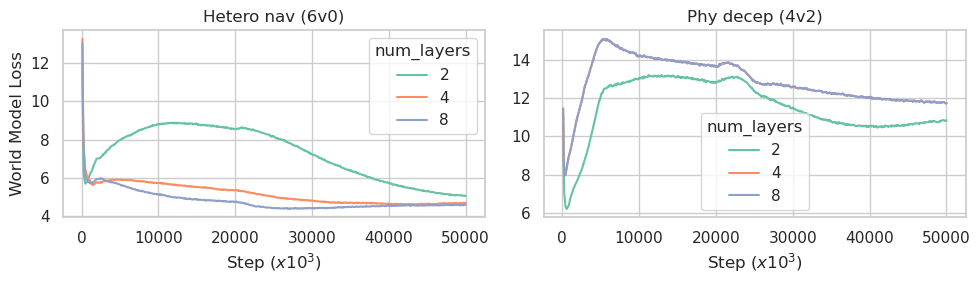

In [32]:
csvfiles = os.listdir(worldmodels_dir)
csvfiles = np.array(csvfiles)
csvfiles = csvfiles[[11,4]]
othercsvfiles = [os.path.join(worldmodels_dir, f) for f in csvfiles]

csvfiles = os.listdir(varying_num_layers_dir)
csvfiles = [os.path.join(varying_num_layers_dir, f) for f in csvfiles]

csvfiles = csvfiles + othercsvfiles


for i, csvfile in enumerate(csvfiles):
    df_temp = pd.read_csv(csvfile)
    
    if 'team' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{team,cond}$'
        conditioned = True
    elif 'team' in csvfile:
        method = '$ELIGN_{team}$'
        conditioned = False
    elif 'adv' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{adv,cond}$'
        conditioned = True
    elif 'adv' in csvfile:
        method = '$ELIGN_{adv}$'
        conditioned = False

    if 'simple_spread' in csvfile:
        task = 'Coop nav (5v0)'
    elif 'hetero_spread' in csvfile:
        task = 'Hetero nav (6v0)'
    elif 'simple_adversary' in csvfile:
        task = 'Phy decep (4v2)'
    elif 'simple_tag' in csvfile:
        task = 'Pred-prey (4v4)'
    elif 'simple_push' in csvfile:
        task = 'Keep-away (4v4)'

    if '4' in csvfile:
        num_layers = 4
    elif '8' in csvfile:
        num_layers = 8
    else:
        num_layers = 2

    df_temp['task'] = task
    df_temp['method'] = method
    df_temp['conditioned'] = conditioned
    df_temp['num_layers'] = num_layers

    if i == 0:
        df = df_temp
    else:
        df = pd.concat([df, df_temp], ignore_index=True)

df_groups = df.groupby(['task'])
hue_orders = [['$ELIGN_{team}$', '$ELIGN_{team,cond}$'],
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$'], 
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$', '$ELIGN_{adv}$', '$ELIGN_{adv,cond}$'],
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$', '$ELIGN_{adv}$', '$ELIGN_{adv,cond}$'],
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$', '$ELIGN_{adv}$', '$ELIGN_{adv,cond}$']]
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(10,3))
for i, (name, df_group) in enumerate(df_groups):
    ax = axes[i]
    print(name)

    legend = True
    #legend=False
    #if i == 0:
    #    legend=True
    #else:
    #    legend=False
    g = sns.lineplot(x="Step", y="Value", hue="num_layers", data=df_group, palette=sns.color_palette("Set2"), ax=ax, legend=legend)
    #if legend == True:
    #    plt.legend(loc="upper center", bbox_to_anchor=(-1.9, -0.25), ncol=4)
    ax.set_ylabel('')
    if i==0:
        ax.set_ylabel('World Model Loss')
    ax.set_xlabel('Step ($x10^3$)')
    ax.set_title(name)

#plt.suptitle('Test Reward after 50 Epochs')
plt.tight_layout()
plt.savefig('figures/varyinglayers_worldmodel_loss.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# Varying Num Agents

/tmp/ipykernel_32842/3024809913.py:68: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, df_group) in enumerate(df_groups):
/tmp/ipykernel_32842/3024809913.py:78: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g = sns.lineplot(x="Step", y="Value", hue="num_agents", data=df_group, palette=sns.color_palette("Set2"), ax=ax, legend=legend)
/tmp/ipykernel_32842/3024809913.py:78: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g = sns.lineplot(x="Step", y="Value", hue="num_agents", data=df_group, palette=sns.color_palette("Set2"), ax=ax, legend=legend)


Hetero nav
Phy decep


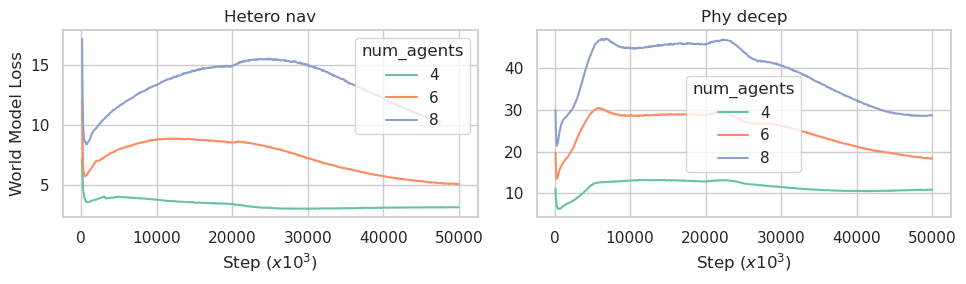

In [38]:
csvfiles = os.listdir(worldmodels_dir)
csvfiles = np.array(csvfiles)
csvfiles = csvfiles[[11,4]]
othercsvfiles = [os.path.join(worldmodels_dir, f) for f in csvfiles]

csvfiles = os.listdir(varying_num_agents_dir)
csvfiles = [os.path.join(varying_num_agents_dir, f) for f in csvfiles]

csvfiles = csvfiles + othercsvfiles


for i, csvfile in enumerate(csvfiles):
    df_temp = pd.read_csv(csvfile)
    
    if 'team' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{team,cond}$'
        conditioned = True
    elif 'team' in csvfile:
        method = '$ELIGN_{team}$'
        conditioned = False
    elif 'adv' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{adv,cond}$'
        conditioned = True
    elif 'adv' in csvfile:
        method = '$ELIGN_{adv}$'
        conditioned = False

    if 'simple_spread' in csvfile:
        task = 'Coop nav (5v0)'
    elif 'hetero_spread' in csvfile:
        task = 'Hetero nav'
    elif 'simple_adversary' in csvfile:
        task = 'Phy decep'
    elif 'simple_tag' in csvfile:
        task = 'Pred-prey (4v4)'
    elif 'simple_push' in csvfile:
        task = 'Keep-away (4v4)'

    if '4' in csvfile:
        num_agents = 4
    elif '6' in csvfile:
        num_agents = 6
    elif '8' in csvfile:
        num_agents = 8
    else:
        if 'Hetero' in task:
            num_agents = 6
        elif 'Phy decep' in task:
            num_agents = 4

    df_temp['task'] = task
    df_temp['method'] = method
    df_temp['conditioned'] = conditioned
    df_temp['Num Coop Agents'] = num_agents

    if i == 0:
        df = df_temp
    else:
        df = pd.concat([df, df_temp], ignore_index=True)

df_groups = df.groupby(['task'])
hue_orders = [['$ELIGN_{team}$', '$ELIGN_{team,cond}$'],
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$'], 
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$', '$ELIGN_{adv}$', '$ELIGN_{adv,cond}$'],
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$', '$ELIGN_{adv}$', '$ELIGN_{adv,cond}$'],
              ['$ELIGN_{team}$', '$ELIGN_{team,cond}$', '$ELIGN_{adv}$', '$ELIGN_{adv,cond}$']]
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(10,3))
for i, (name, df_group) in enumerate(df_groups):
    ax = axes[i]
    print(name)

    legend = True
    #legend=False
    #if i == 0:
    #    legend=True
    #else:
    #    legend=False
    g = sns.lineplot(x="Step", y="Value", hue="num_agents", data=df_group, palette=sns.color_palette("Set2"), ax=ax, legend=legend)
    #if legend == True:
    #    plt.legend(loc="upper center", bbox_to_anchor=(-1.9, -0.25), ncol=4)
    ax.set_ylabel('')
    if i==0:
        ax.set_ylabel('World Model Loss')
    ax.set_xlabel('Step ($x10^3$)')
    ax.set_title(name)

#plt.suptitle('Test Reward after 50 Epochs')
plt.tight_layout()
plt.savefig('figures/varyingagents_worldmodel_loss.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()